# Applied Data Analysis - Fall 2016
## Twitter-Swisscom Project

### Mobility pattern: Statistics


1 - [Population locations](#locations)

2 - [Population routing](#routing)

3 - [Exploration of cities home/work locations](#exploration)

In [1]:
import pandas as pd
import math
import numpy as np
from mobility_helper import *
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import time
from geopy.geocoders import Nominatim,Bing
import datetime as dt
import folium

In [4]:
users = pd.read_csv('./data/users_final.csv', encoding = "utf-8")
print('Our final dataset contains '+str(len(users))+' users.')

Our final dataset contains 5270 users.


### 1 - <a id='locations'> Population locations </a>


### Movements between countries

We plot the nationality distribution of our users:

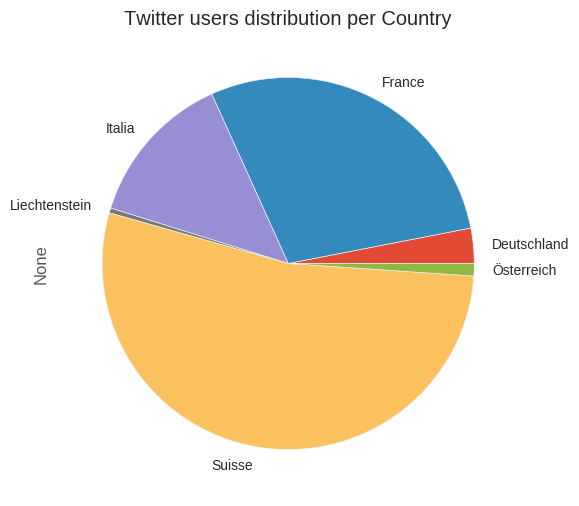

In [5]:
plt.style.use('ggplot')
per_countries = users[users.homeCountry == users.workCountry].groupby('homeCountry').size()
per_countries.columns = ['Number of users']
per_countries.plot.pie(figsize=(6,6), title="Twitter users distribution per Country")
plt.savefig('./figs/tweetpercountry.png')
plt.show()

From the home countries and work countries we extracted, we can now detect the borderers among our users.

In [6]:
#globally
borderers = users[users.homeCountry != users.workCountry]
print("Number of detected borderers: ", len(borderers))
print("Percentage of detected borderers: ", 100*(len(borderers)/len(users)))

Number of detected borderers:  67
Percentage of detected borderers:  1.2713472485768502


We now check the different movements in between countries.

In [7]:
print("Different detected movements: ")
flows = pd.DataFrame(borderers.groupby(['homeCountry', 'workCountry']).size())
flows

Different detected movements: 


0
homeCountry workCountry      
Deutschland Suisse          2
France      Italia          2
            Suisse         25
Italia      Deutschland     1
            France          3
            Suisse          8
Suisse      France         15
            Italia          4
            Liechtenstein   2
            Österreich      4
Österreich  Suisse          1

We first check the distributions of our borderers' nationalities.

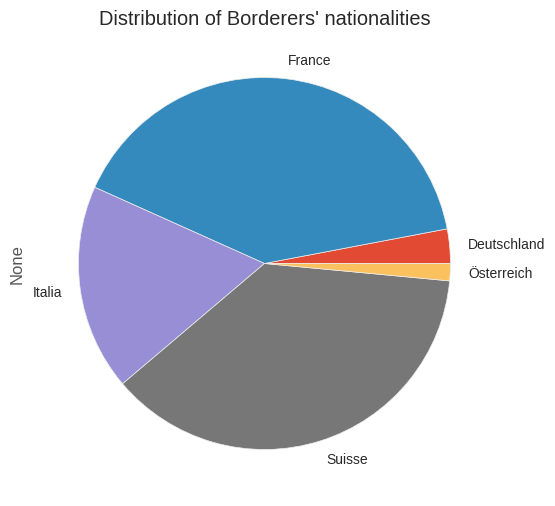

In [9]:
grouped = borderers.groupby('homeCountry').size()

plt.style.use('ggplot')
grouped.plot.pie(figsize=(6,6), title="Distribution of Borderers' nationalities")
plt.savefig('./figs/borderers.png')
plt.show()

We now check the countries where borderers FROM Switzerland go to.

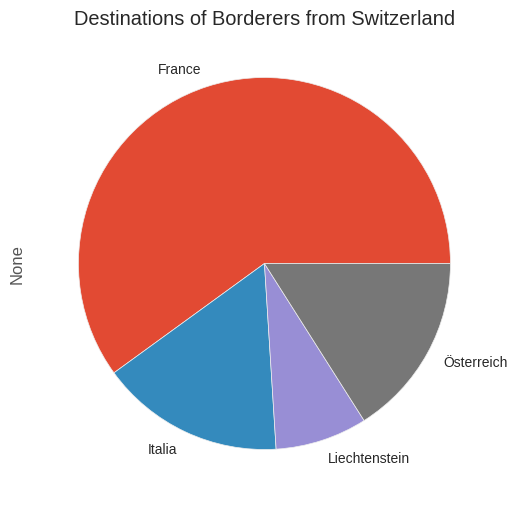

In [10]:
swiss = borderers[(borderers.homeCountry == "Suisse") & (borderers.workCountry != "Suisse")]
ch = swiss.groupby('workCountry').size()
plt.style.use('ggplot')
ch.plot.pie(figsize=(6,6), title="Destinations of Borderers from Switzerland")
plt.savefig('./figs/borderers_from_switzerland.png')
plt.show()

We check the nationalities of borderers going TO Switzerland.

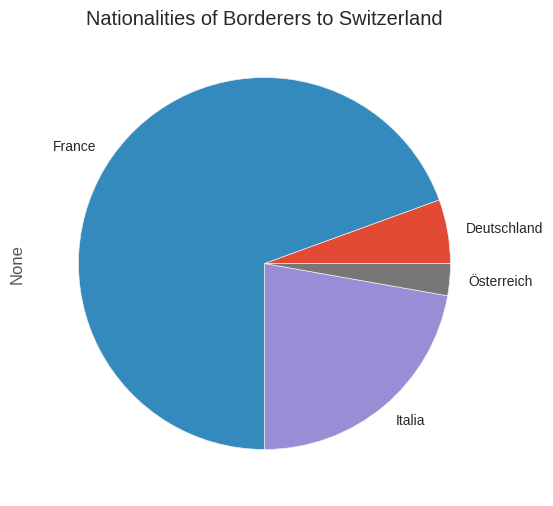

In [12]:
swiss = borderers[(borderers.homeCountry != "Suisse") & (borderers.workCountry == "Suisse")]
ch = swiss.groupby('homeCountry').size()
plt.style.use('ggplot')
ch.plot.pie(figsize=(6,6), title="Nationalities of Borderers to Switzerland")
plt.savefig('./figs/borderers_to_switzerland.png')
plt.show()

### Movements between Cantons

Distribution of users among cantons.

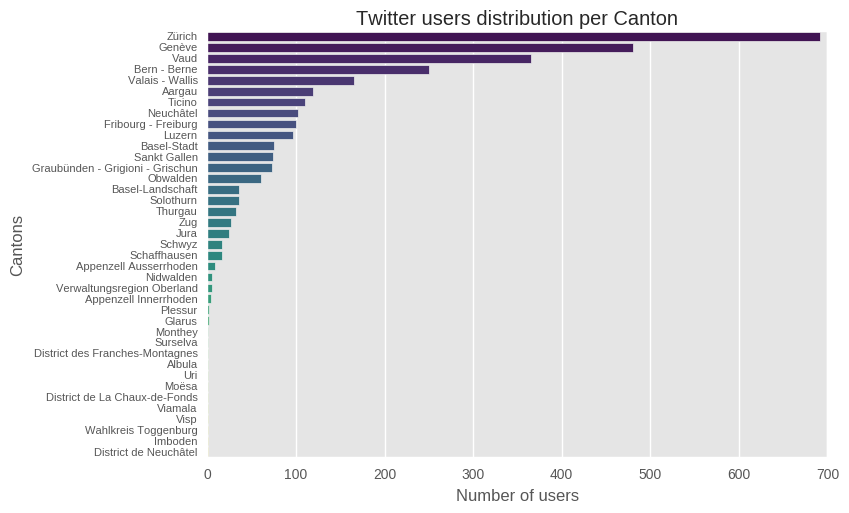

In [17]:
swiss = users[(users.homeCountry == users.workCountry) & (users.homeCountry == "Suisse")]

swiss_equals = swiss[swiss.homeCanton == swiss.workCanton]
g1 = pd.DataFrame(swiss_equals.groupby('homeCanton').size())
g1.columns = ['c1']

swiss_differs = swiss[swiss.homeCanton != swiss.workCanton]
g2 = pd.DataFrame(swiss_differs.groupby('homeCanton').size())
g2.columns = ['c2']

g3 = pd.DataFrame(swiss_differs.groupby('workCanton').size())
g3.columns = ['c3']

g = pd.concat([g1,g2,g3], axis=1)
g = g.fillna(0)
g['cantons'] = g.index.values
g['count'] = g['c1']+g['c2']+g['c3']
g = g.drop(['c1', 'c2', 'c3'], axis=1)
g = g.sort_values(by=['count'], ascending=False)

ax = sns.barplot(x="count", y="cantons", data=g,
            label="Number of users", palette="viridis")
ax.set(ylabel="Cantons",xlabel="Number of users")
sns.plt.title("Twitter users distribution per Canton")
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.savefig('./figs/tweetspercanton.png')
plt.show()

Distribution of Swiss working and living in different cantons.

In [18]:
#globally
diffcant = users[(users.homeCountry == "Suisse") & (users.homeCanton != users.workCanton)]
swiss = users[users.homeCountry == "Suisse"]
print("Number of detected users in different canton: ", len(diffcant))
print("Percentage of detected users among swiss: ", 100*(len(diffcant)/len(swiss)))

Number of detected users in different canton:  243
Percentage of detected users among swiss:  8.681672025723474


In [19]:
print("Different detected movements: ")
main_cantons = ['Zürich', "Genève", "Vaud", "Bern - Berne", "Valais - Wallis", "Aargau"]
flows = pd.DataFrame(diffcant[diffcant.homeCanton.isin(main_cantons)].groupby(['homeCanton', 'workCanton']).size())

flows

Different detected movements: 


0
homeCanton      workCanton                          
Aargau          Luzern                             1
                Solothurn                          2
                Vaud                               1
                Zug                                1
                Zürich                            16
Bern - Berne    -                                  1
                Basel-Stadt                        1
                Luzern                             1
                Obwalden                           1
                Solothurn                          2
                Valais - Wallis                    2
                Vaud                               2
                Zürich                             9
Genève          -                                  8
                Aargau                             1
                Basel-Landschaft                   1
                Basel-Stadt                        1
                Bern - Berne                       1
                Obwalden                           3
                Valais - Wallis                    2
                Vaud                               3
                Zürich                             6
Valais - Wallis -                                  3
                Genève                             1
                Luzern                             1
                Neuchâtel                          1
                Vaud                               4
                Zürich                             1
Vaud            Aargau                             3
                Fribourg - Freiburg                5
                Genève                             9
                Neuchâtel                          1
                Sankt Gallen                       1
                Ticino                             1
                Valais - Wallis                    3
                Zürich                             3
Zürich          -                                  2
                Aargau                             6
                Basel-Landschaft                   1
                Basel-Stadt                        1
                Bern - Berne                      12
                Genève                             6
                Graubünden - Grigioni - Grischun   1
                Imboden                            1
                Luzern                             4
                Sankt Gallen                       3
                Schaffhausen                       1
                Thurgau                            1
                Ticino                             4
                Valais - Wallis                    1
                Vaud                               8
                Zug                                1

### Home Location vs Work Location

We are interested in people working and living at the same location.

In [20]:
#percentage working at home or not working
working_home = users[(users.workLat == users.homeLat) & (users.workLong == users.homeLong)]

In [21]:
n = len(working_home)
perc = 100*(n/len(users))
print("Number of users working at home or not working: "+str(n))
print("Percentage of people working at home: "+str(int(perc))+"%")

Number of users working at home or not working: 3753
Percentage of people working at home: 71%


In [23]:
users['working@home'] = (users.workLat == users.homeLat) & (users.workLong == users.homeLong)

It is a high number. Given our assumptions it just means that tweets during the day and during the night were sent at the same place. 

Distribution of working@home per Canton. We discard people living and working in different canton.

In [24]:
def work_percentage(group):
    n = len(group[group["working@home"]])
    N = len(group)
    perc = 100*(n/N)
    return pd.Series({'@home': perc, 'total': 100})


per_cant = users[(users.homeCanton == users.workCanton)\
                 & (users.homeCountry == "Suisse") & (users.homeCanton.isin(main_cantons))]\
.groupby(['workCanton']).apply(work_percentage)

per_cant['Canton'] = per_cant.index.values
per_cant = per_cant.reset_index(drop=True)
per_cant.head()

,@home,total,Canton
0,76.744186,100.0,Aargau
1,81.516588,100.0,Bern - Berne
2,73.137698,100.0,Genève
3,70.270270,100.0,Valais - Wallis
4,68.354430,100.0,Vaud


We now plot the given ratios for the major cantons.

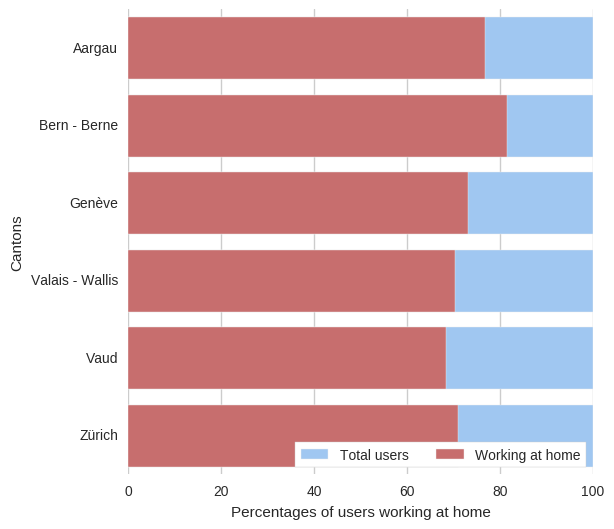

In [26]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="Canton", data=per_cant,
            label="Total users", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="@home", y="Canton", data=per_cant,
            label="Working at home", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Cantons",xlabel="Percentages of users working at home")
sns.despine(left=True, bottom=True)
plt.savefig('./figs/athome_percentage.png')
plt.show()

### Population routing: Home-Work

### Average Swiss:
- closeness to center of town
- distance to work
- time to go to work by car

In [27]:
swiss = users[(users.homeCountry == "Suisse")]

s= list(swiss['closer to home'])
split = list(map(lambda x: float(x.split(', ')[1][:-1]), s))

l = list(filter(lambda x: x < 20,map(float, split)))
print("Distance home from center of town swiss:")
pd.DataFrame(l).describe()

Distance home from center of town swiss:


,0
count,1766.000000
mean,5.874809
std,5.108324
min,0.253818
25%,1.674336
50%,4.218802
75%,7.453746
max,19.995448


In [28]:
print("Distance from work swiss:")
pd.DataFrame(swiss['distance']).describe()

Distance from work swiss:


,distance
count,2799.000000
mean,8.615459
std,30.302306
min,0.000000
25%,0.000000
50%,0.000000
75%,1.351467
max,256.732558


In [29]:
print("Route Time Average Swiss:")
pd.DataFrame(swiss['routeTime']).describe()

Route Time Average Swiss:


,routeTime
count,2799.000000
mean,10.077349
std,27.965784
min,0.000000
25%,0.000000
50%,0.000000
75%,5.891667
max,299.500000


### Per canton

In [30]:
def avg_dtime(group):
    return pd.Series({"avg distance": group["distance"].mean(), "avg time": group["routeTime"].mean()})


cant_dist_time = pd.DataFrame(swiss[swiss.homeCanton.isin(main_cantons)].groupby('homeCanton').apply(avg_dtime))
print("Average distance from work and time travel to work per main Cantons:")
cant_dist_time

Average distance from work and time travel to work per main Cantons:


,avg distance,avg time
homeCanton,,
Aargau,7.382032,9.219159
Bern - Berne,8.684536,10.733406
Genève,7.562918,7.817768
Valais - Wallis,6.699704,12.198637
Vaud,8.200027,9.538109
Zürich,11.314645,11.595344


### For Borderers

In [31]:
print("Distance and time from home to work:")
borderers[["distance", "routeTime"]].describe()

Distance and time from home to work:


,distance,routeTime
count,67.000000,67.000000
mean,61.422583,73.350746
std,68.343603,71.567629
min,1.539969,0.000000
25%,10.807168,19.416667
50%,35.774367,46.866667
75%,91.818483,105.566667
max,299.180318,285.116667


## Exploration of cities home/work locations
- Geneva
- Zürich

We generate a folium map of the latter to visualize potential work and residentials areas.

In [32]:
city = users[['workLat', 'workLong', 'closer to work', 'homeLat', 'homeLong', 'closer to home']]

w = list(city['closer to work'])
work = list(map(lambda x: float(x.split(', ')[1][:-1]), w))
citywork = list(map(lambda x: x.split(', ')[0][2:-1], w))
city['closer to work'] = pd.DataFrame(work)
city['citywork'] = pd.DataFrame(citywork)

h= list(city['closer to home'])
home = list(map(lambda x: float(x.split(', ')[1][:-1]), h))
cityhome = list(map(lambda x: x.split(', ')[0][2:-1], h))
city['closer to home'] = pd.DataFrame(home)
city['cityhome'] = pd.DataFrame(cityhome)

geneva = city[(city.cityhome == "Geneva") | (city.citywork == "Geneva")]
geneva = geneva[(geneva['closer to home'] < 15) & (geneva['closer to work'] < 15)]
geneva = geneva[(geneva.workLat != geneva.homeLat) & (geneva.workLong != geneva.homeLong)]

zurich = city[(city.cityhome == "Zurich") | (city.citywork == "Zurich")]
zurich = zurich[(zurich['closer to home'] < 30) & (zurich['closer to work'] < 30)]
zurich = zurich[(zurich.workLat != zurich.homeLat) & (zurich.workLong != zurich.homeLong)]

/home/hparmantier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hparmantier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hparmantier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [34]:
main_cities = {
    'Zurich': [47.36667, 8.55000],
    'Geneva':[46.2,6.1667],
    'Basel': [47.5667,7.6],
    'Bern' : [46.9167,7.4667],
    'Lausanne': [46.5333,6.6667],
    'Luzern': [47.0833,8.2667],
    'Sion': [46.2333,7.35],
    'Varese': [45.8176,8.8264],
    'Mulhouse': [47.75, 7.3333],
    'Annecy': [45.9,6.1167],
    'Annemasse': [46.1944, 6.2377],
    'Pontarlier': [46.9035,6.3554],
    'Aoste': [45.5833, 5.6]
}

Geneva

In [35]:
print("Saving of Geneva neighborhood...")
map_1 = folium.Map(location=main_cities['Geneva'], zoom_start=13,tiles='Stamen Toner')
for index, row in geneva.iterrows():
    folium.CircleMarker([row.workLat, row.workLong], popup=str(row.workLat)+','+str(row.workLong),
                    color='#fe2e2e',fill_color='#fe2e2e', radius =50).add_to(map_1)
    folium.CircleMarker([row.homeLat, row.homeLong], popup=str(row.homeLat)+','+str(row.homeLong),
                  color='#0000FF',fill_color='#0000FF', radius=50).add_to(map_1)
map_1.save('./figs/geneva.html')
print("Saved.")

Saving of Geneva neighborhood...
Saved.


Zürich

In [36]:
print("Saving of Zurich neighborhood...")
map_1 = folium.Map(location=main_cities['Zurich'], zoom_start=13,tiles='Stamen Toner')
for index, row in zurich.iterrows():
    folium.CircleMarker([row.workLat, row.workLong], popup=str(row.workLat)+','+str(row.workLong),
                    color='#fe2e2e',fill_color='#fe2e2e', radius =50).add_to(map_1)
    folium.CircleMarker([row.homeLat, row.homeLong], popup=str(row.homeLat)+','+str(row.homeLong),
                  color='#0000FF',fill_color='#0000FF', radius=50).add_to(map_1)
map_1.save('./figs/zurich.html')
print("Saved.")

Saving of Zurich neighborhood...
Saved.
